*****************************

Реализовать оптимизацию методом градиентного спуска для.
$$x^2(sin(0,5x)^2+1)$$
Какие параметры шага и количества итераций оптимальны? При каких значениях шага оптимизиция не выходит из локальных минимумов? Подробные условия смотрите в .ipynb файле, приложенном к материалам.

In [1]:
import numpy as np
import math
import sympy as sp
from sympy import *
from matplotlib import pyplot as plt
import warnings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('ggplot')
plt.rcParams["font.family"] = "Times New Roman"
warnings.filterwarnings('ignore')

In [2]:
# исходная функция
def func(x):
    return (x**2)*(np.sin(0.5*x)**2+1)

In [3]:
# найдем производную
x = Symbol('x')
func_d = (x**2)*(sp.sin(0.5*x)**2+1)
derivative_f = Derivative(func_d, x)
diff = derivative_f.doit()
diff

1.0*x**2*sin(0.5*x)*cos(0.5*x) + 2*x*(sin(0.5*x)**2 + 1)

In [4]:
def grad_f(x):
    return 2*x*(np.sin(x/2)**2 + 1) + (x**2)*(np.cos(x/2)*np.sin(x/2))

Урвнение k-го шага градиентного спуска:
$$w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X).$$

In [5]:
class Optimizer:

    def __init__(self, x_min, eps):
        self.x_min = x_min
        self.eps = eps

    def plot_show(self, x_min: list, left_pos=-100, right_pos=100, scale=5000):
        x = np.linspace(left_pos, right_pos, scale)
        plt.figure(figsize=(12, 8))
        plt.plot(x, func(x), 'b')
        if x_min != []:
            for x in x_min:
                plt.scatter(x, func(x), edgecolors='white', s=55, c='darkred')
                plt.axvline(x, color='g', linestyle='--')
        plt.show()

    def gradient_descent(self, eta_step, max_iter, x_0):
        for i in range(max_iter):
            x_previos = x_0
            x_0 -= eta_step*grad_f(x_0)
            eps_step = abs(x_previos-x_0)
            if abs(x_0) > abs(x_0)*100:
                return np.inf, np.inf
        return x_0, eps_step

    def search_optimal(self, max_iter, eta_linspace, x_0):
        i = 1
        fl = 0
        eps_step = 0
        local_min_set = set()
        while not fl:
            for eta in eta_linspace:
                a, eps_step = self.gradient_descent(eta, i, x_0)

                if eps_step < self.eps and abs(a-self.x_min) < self.eps:
                    local_min_set.add(round(a, 2))
                    fl = 1
                    print('*'*100, '\n')
                    print(
                        f' Схождение градиентного спуска при праметрах \n',
                        f'Количество итераций: {i}, шаг eta: {eta: .3f}, x_min={a: .3f}\n',
                        f'значение функции в точке x_min={func(a): .3f}.'
                        f'Начальное приближение x_O = {x_0}'
                    )
                    self.plot_show(local_min_set)
                    return i, eta
                else:
                    if eps_step < self.eps and a != x_0 and abs(a-self.x_min) > 1:
                        local_min_set.add(round(a, 2))
                        print(
                            f'Зависание на локльком минимуме x= {round(a, 3)}, при iter= {i}, eta= {eta:.5f}')

            i += 2
            if i > max_iter:
                print(
                    f'Схождение не  было достигнуто за {max_iter} итераций. Начальное приближение x_O = {x_0}')
                return None, None

In [6]:
opt = Optimizer(0, 0.001)

Зависание на локльком минимуме x= 43.891, при iter= 7, eta= 0.00100
Зависание на локльком минимуме x= 43.891, при iter= 7, eta= 0.00120
Зависание на локльком минимуме x= 43.891, при iter= 7, eta= 0.00140
Зависание на локльком минимуме x= 43.891, при iter= 9, eta= 0.00080
Зависание на локльком минимуме x= 43.891, при iter= 9, eta= 0.00100
Зависание на локльком минимуме x= 43.891, при iter= 9, eta= 0.00120
Зависание на локльком минимуме x= 43.891, при iter= 9, eta= 0.00140
Зависание на локльком минимуме x= 43.891, при iter= 11, eta= 0.00080
Зависание на локльком минимуме x= 43.891, при iter= 11, eta= 0.00100
Зависание на локльком минимуме x= 43.891, при iter= 11, eta= 0.00120
Зависание на локльком минимуме x= 43.891, при iter= 11, eta= 0.00140
Зависание на локльком минимуме x= 12.223, при iter= 11, eta= 0.01904
Зависание на локльком минимуме x= 43.891, при iter= 13, eta= 0.00060
Зависание на локльком минимуме x= 43.891, при iter= 13, eta= 0.00080
Зависание на локльком минимуме x= 43.891,

Зависание на локльком минимуме x= 43.891, при iter= 25, eta= 0.00040
Зависание на локльком минимуме x= 43.891, при iter= 25, eta= 0.00060
Зависание на локльком минимуме x= 43.891, при iter= 25, eta= 0.00080
Зависание на локльком минимуме x= 43.891, при iter= 25, eta= 0.00100
Зависание на локльком минимуме x= 43.891, при iter= 25, eta= 0.00120
Зависание на локльком минимуме x= 43.891, при iter= 25, eta= 0.00140
Зависание на локльком минимуме x= 43.891, при iter= 25, eta= 0.00160
Зависание на локльком минимуме x= 43.891, при iter= 25, eta= 0.00180
Зависание на локльком минимуме x= 12.223, при iter= 25, eta= 0.01623
Зависание на локльком минимуме x= 12.223, при iter= 25, eta= 0.01663
Зависание на локльком минимуме x= 12.223, при iter= 25, eta= 0.01683
Зависание на локльком минимуме x= 12.223, при iter= 25, eta= 0.01764
Зависание на локльком минимуме x= 12.223, при iter= 25, eta= 0.01884
Зависание на локльком минимуме x= 12.223, при iter= 25, eta= 0.01904
Зависание на локльком минимуме x= 

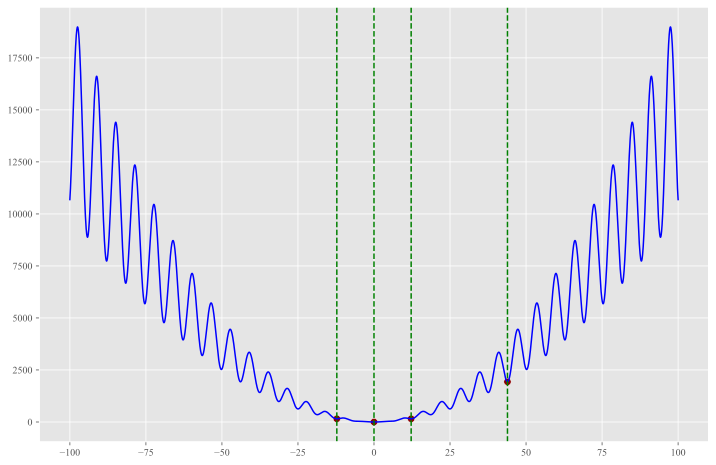

In [7]:
iter_opt, eta_opt = opt.search_optimal(
    200, np.linspace(0, 0.1, 500), x_0=-np.random.uniform(-100, 100))